In [3]:
!pip install pandas

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv("imdb_movies.csv")

In [6]:
data.replace(0, pd.NA,inplace = True)
data.drop_duplicates(inplace = True)

In [8]:
#1 با رسم جدول نشان دهید در هر سال چند فیلم سینمایی منتشر شده است؟ 

movies_per_year = data.groupby('release_year').size().reset_index(name='num_movies')
print("movies per year:")
pd.DataFrame(movies_per_year)

movies per year:


,release_year,num_movies
0,1960,32
1,1961,31
2,1962,32
3,1963,34
4,1964,42
5,1965,35
6,1966,46
7,1967,40
8,1968,39
9,1969,31


<Axes: xlabel='release_year'>

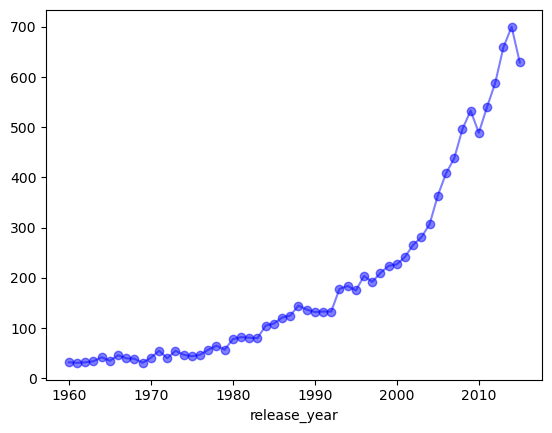

In [9]:
#2 با رسم نمودار روند تعداد فیلم های سینمایی انتشار یافته را نشان دهید. 
movies_per_year = data.groupby('release_year').size()
movies_per_year.plot.line(marker='o', color='blue',alpha = 0.5)

In [11]:
#3 میانگین طول فیلم های سینمایی در طول همه سالها بطور میانگین چه مقدار بوده است؟ 

z = data.dropna(subset = ["runtime"])
print(f"average runtime for all movie duiring this period is around {int(z.runtime.mean())} min.")
# البته میشد دراپ نکرد چون ان ای هارو در هر صورت در نظر نمیگرفت

average runtime for all movie duiring this period is around 102 min.


In [14]:
#4 میانگین طول فیلم های سینمایی در هر سال چند دقیقه بوده است؟ پاسخ را به ساعت و دقیقه نمایش دهید
z = data.groupby('release_year')["runtime"].mean()
hours = z//60
hours = hours.astype(int)
min_  = z-hours*60 
min_ = min_.astype(int)
k = {'hours':hours,'min':min_}
k = pd.DataFrame(k)
k

,hours,min
release_year,,
1960,1,50
1961,1,59
1962,2,4
1963,1,51
1964,1,49
1965,1,58
1966,1,46
1967,1,44
1968,1,47


In [17]:
#5 طوالنی تر ین و کوتاهتر ین فیلم ثبت شده، کدام فیلم ها بوده است؟ 

shortest = data.sort_values(by = 'runtime')
short = shortest.iloc[0]['original_title']
longest = data.sort_values(by = 'runtime', ascending = False)
long = longest.iloc[0]['original_title']
print(f"The shortest movie is: {short}.")
print(f"The longest movie is: {long}.")

The shortest movie is: Cousin Ben Troop Screening.
The longest movie is: The Story of Film: An Odyssey.


In [202]:
#6 طوالنی تر ین و کوتاهتر ین فیلم برا ی هر سال کدام فیلم بوده است؟ 

data['runtime']=pd.to_numeric(data['runtime'])
data.dropna(subset = ['runtime'],inplace = True)
data_year = data.groupby('release_year')

shortest_index = data_year.runtime.idxmin()
longest_index = data_year.runtime.idxmax()

shortest_per_year = data.loc[shortest_index]
longest_per_year = data.loc[longest_index]
longest_per_year.reset_index(inplace = True)
shortest_per_year.reset_index(inplace = True)

k = shortest_per_year[['release_year','original_title','runtime']]
z = longest_per_year[['release_year','original_title','runtime']]
k = pd.DataFrame(k)
z = pd.DataFrame(z)

print("Shortest movie per year:")
print(k)
print('_'*100)
print("Longest movie per year:")
print(z)

Shortest movie per year:
    release_year                                  original_title  runtime
0           1960                      The Little Shop of Horrors     70.0
1           1961                  One Hundred and One Dalmatians     79.0
2           1962                               Carnival of Souls     78.0
3           1963                                  Dinner for One     18.0
4           1964                                  Scorpio Rising     28.0
5           1965                       A Charlie Brown Christmas     25.0
6           1966           It's the Great Pumpkin, Charlie Brown     25.0
7           1967                            Six Men Getting Sick      4.0
8           1968                                    The Alphabet      4.0
9           1969                            Bambi Meets Godzilla      2.0
10          1970                   Santa Claus Is Comin' to Town     48.0
11          1971                                    Brian's Song     73.0
12          1

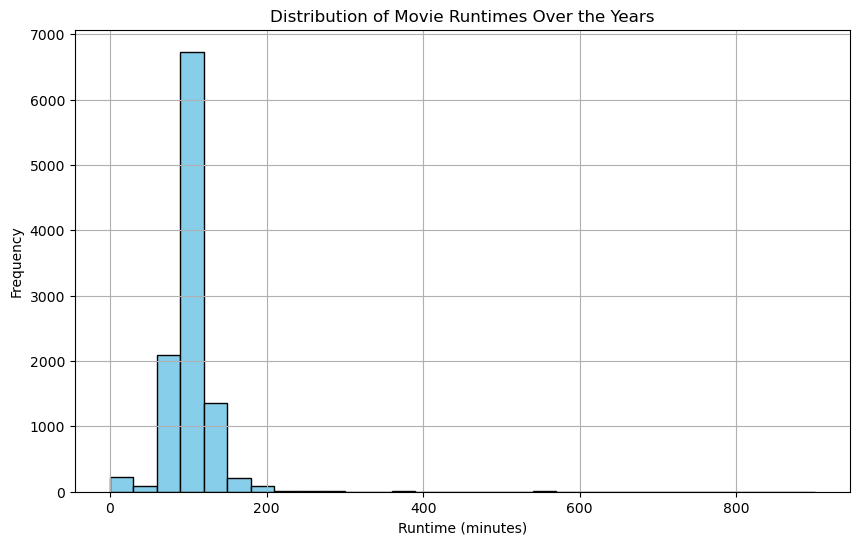

In [66]:
#7 با استفاده از نمودار هیستوگرام، توز یع مدت زمان فیلم ها در طول تار یخ را بکشید. 

import matplotlib.pyplot as plt
runtimes = data['runtime']
plt.figure(figsize=(10, 6))
plt.hist(runtimes, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Runtimes Over the Years')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [31]:
#8  میانگین بودجه اختصاص یافته به فیلمها در طول تار یخ چه مقدار بوده است؟ 

z = data.dropna(subset = ["budget_adj"])
average_budget = int(z.budget_adj.mean())
print(f"Average budget for every movie duiring this period is around {average_budget}$.")

Average budget for every movie duiring this period is around 17551039$.


In [33]:
#9 میانگین درآمد اختصاص یافته به فیلم ها در طول تار یخ چه مقدار بوده است؟

z = data.dropna(subset = ['revenue_adj'])
average_revenue = int(z.revenue_adj.mean())
print(f"Average revenue for every movie duiring this period is around {average_revenue}$.")

Average revenue for every movie duiring this period is around 51364363$.


In [41]:
#10 میانگین بودجه و درآمد اختصاص یافته در هر سال چه مقدار بوده است؟
avg_buget_per_year = data.groupby('release_year')['budget_adj'].mean()
avg_revenue_per_year = data.groupby('release_year')['revenue_adj'].mean()
avg_buget_per_year = avg_buget_per_year.astype(int)
avg_revenue_per_year =avg_revenue_per_year.astype(int)
w = {'avg_buget_per_year':avg_revenue_per_year,'avg_revenue_per_yearr':avg_buget_per_year}
pd.DataFrame(w)

,avg_buget_per_year,avg_revenue_per_yearr
release_year,,
1960,33409910,5082036
1961,79471674,10856871
1962,48562384,12326926
1963,39245798,15356865
1964,57076026,6608980
1965,90576704,13881684
1966,12375267,8405521
1967,120576267,16448491
1968,42553882,11563665


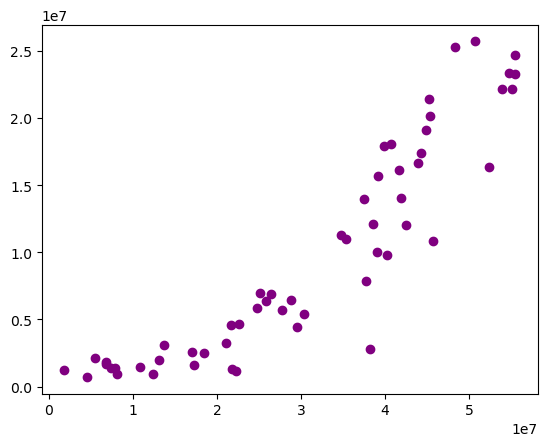

In [46]:
#11 ا پیدا کردن میانگی ن بودجه و درآمد برای هر سال، رابطه بین بودجه و درآمد را با استفاده از نمودار scatter
#را در طول سالهای ثبتشده رسم کنید 
import matplotlib.pyplot as plt
avg_buget_per_year = data.groupby('release_year')['budget'].mean()
avg_revenue_per_year = data.groupby('release_year')['revenue'].mean()
plt.scatter(avg_revenue_per_year,avg_buget_per_year, color="purple")

the most famous genre is:Drama


<Axes: xlabel='gen'>

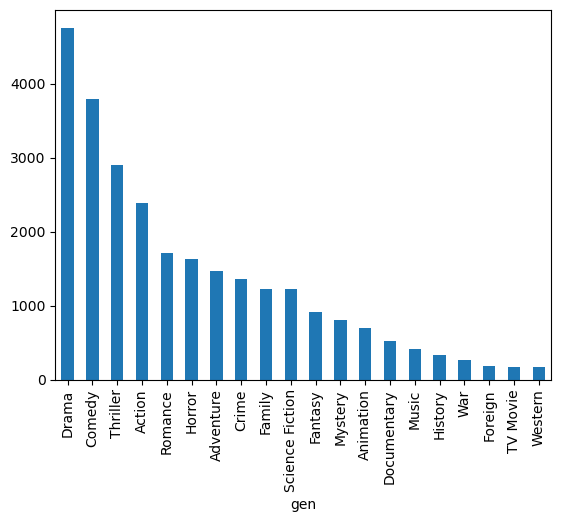

In [65]:
#12.12 با استفاده از ستون genres و استخراج متن داخل این ستون، توز یع ژانرهای تولید شده فیلم را بیابید . کدام
#انر بیشتر ین تعداد فیلم منتشر شده را دارد؟ نمودار میلهای آن را بکشید.
data['gen'] = data.genres.str.split('|')
a= data.gen.explode().value_counts()
print("the most famous genre is:",end = '')
print(a.idxmax())
data.gen.explode().value_counts().plot.bar()

In [73]:
#13 سود هر فیلم را محاسبه کنید. پر سودتر ین فیلم تار یخ چه فیلمی بوده است؟
data['profit'] = pd.to_numeric(data.revenue.dropna()) - pd.to_numeric(data.budget.dropna())
z = data.profit
most_profit  = z.idxmax()
movie_with_the_most_profit = data.loc[most_profit]
print(f"The most profit belongs to the movie {movie_with_the_most_profit.original_title} with {z.max()} $.")
print("profit of other movies are:")
k = data[['original_title','profit']].dropna()
pd.DataFrame(k)

The most profit belongs to the movie Avatar with 2544505847 $.
profit of other movies are:


,original_title,profit
0,Jurassic World,1363528810
1,Mad Max: Fury Road,228436354
2,Insurgent,185238201
3,Star Wars: The Force Awakens,1868178225
4,Furious 7,1316249360
...,...,...
10861,The Endless Summer,0
10862,Grand Prix,0
10863,Beregis Avtomobilya,0
10864,"What's Up, Tiger Lily?",0


In [69]:
#14 پر سودتر ین فیلم هر سال، کدام فیلمها بوده است؟
data['profit'] = pd.to_numeric(data.revenue.dropna()) - pd.to_numeric(data.budget.dropna())
z = data.profit
most_profit_per_year = data.loc[data.groupby('release_year')['profit'].idxmax()]
most_profit_per_year = most_profit_per_year.groupby('release_year').sum()
z = most_profit_per_year[['original_title','profit']]
pd.DataFrame(z)

,original_title,profit
release_year,,
1960,Spartacus,4.800000e+07
1961,One Hundred and One Dalmatians,2.118800e+08
1962,Dr. No,5.850000e+07
1963,From Russia With Love,7.639876e+07
1964,Goldfinger,1.214000e+08
1965,The Sound of Music,1.550143e+08
1966,Who's Afraid of Virginia Woolf?,2.623669e+07
1967,The Jungle Book,2.018436e+08
1968,2001: A Space Odyssey,4.471537e+07


In [75]:
#15 با استفاده از ستون companies_production و استخراج متن داخل این ستون، کدام شرکت بی شتر ین فیلم
#را ساخته است؟
data['companies'] = data.production_companies.str.split('|')
company_shaterer = data.explode('companies')
company_shaterer.companies.value_counts().idxmax()
print(f'{company_shaterer.companies.value_counts().idxmax()} has made {company_shaterer.companies.value_counts().max()} which makes them the most movie making company during this period of time.')

Universal Pictures has made 522 which makes them the most movie making company during this period of time.


In [8]:
#16 پنج فیلم برتر از نظر بیشتر ین تعداد رای دهنده کدام فیلم ها است؟ 
the_best_fives=data.sort_values(by="vote_count",ascending=False).head(5).reset_index() 
print(the_best_fives[["original_title","vote_count"]])

     original_title  vote_count
0         Inception        9767
1      The Avengers        8903
2            Avatar        8458
3   The Dark Knight        8432
4  Django Unchained        7375


In [10]:
#17 پنج فیلم برتر از نظر نمره مخاطبین کدام فیلم ها است؟
top_five_films=data.sort_values(by="vote_average",ascending=False).head(5) .reset_index() 
print(top_five_films[["original_title","vote_average"]])


                  original_title  vote_average
0  The Story of Film: An Odyssey           9.2
1           The Mask You Live In           8.9
2  Black Mirror: White Christmas           8.8
3                    Life Cycles           8.8
4              Pink Floyd: Pulse           8.7
